# CS 210  Individual Project                                                   BERKE ÖZER 24821

In [1]:
import pandas as pd
from datetime import datetime
import reverse_geocoder as rg
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Give basic information regarding the dataset such as shape, data types and descriptive statistics that summarize columns


#reading the file , getting data and checking briefly

In [2]:
df = pd.read_csv('taxi-trips.csv')
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


#DESCRIBING THE DATA

In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


#VIEWING INFO

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118185 entries, 0 to 118184
Data columns (total 11 columns):
id                    118185 non-null object
vendor_id             118185 non-null int64
pickup_datetime       118185 non-null datetime64[ns]
dropoff_datetime      118185 non-null datetime64[ns]
passenger_count       118185 non-null int64
pickup_longitude      118185 non-null float64
pickup_latitude       118185 non-null float64
dropoff_longitude     118185 non-null float64
dropoff_latitude      118185 non-null float64
store_and_fwd_flag    118185 non-null object
trip_duration         118185 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 9.9+ MB


#VIEVING SHAPE

In [5]:
df.shape

(118185, 11)

In [6]:
coordinates = df.loc[:,['pickup_latitude','pickup_longitude']]
coordinate_list =[tuple(x) for x in coordinates.values]

#Translating latitude and longitude to districtions

In [7]:
results = rg.search(coordinate_list)

Loading formatted geocoded file...


In [8]:
name_coord = [x['name'] for x in results]

## Creating two new columns named ”pickup district” and ”dropoff district” by applying reverse geocoding  to associated coordinates.


In [9]:
df['pickup_district'] = name_coord
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City


#Checking dropoff latitude and longitude

In [10]:
coordinates_drop = df.loc[:,['dropoff_latitude','dropoff_longitude']]
coordinates_drop_list =[tuple(x) for x in coordinates_drop.values]
coordinates_drop_list[:10]

[(40.765602111816406, -73.96463012695312),
 (40.78998947143555, -73.9729995727539),
 (40.7561912536621, -73.97850036621094),
 (40.76506805419922, -73.95320129394531),
 (40.72270965576172, -73.99899291992188),
 (40.71875, -73.97944641113281),
 (40.75149154663085, -74.00511169433594),
 (40.75788879394531, -73.97180938720702),
 (40.73014831542969, -73.98941040039062),
 (40.70949172973633, -73.91053009033203)]

In [11]:
results_drop = rg.search(coordinates_drop_list)

In [12]:
name_coord_drop = [y['name'] for y in results_drop]

In [43]:
df['dropof_district']=name_coord_drop
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropof_district,distance,time_of_day,week_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1502.171837,rush hour evening,weekday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5114.806749,evening,weekday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1495.018409,rush hour morning,weekday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1976.278537,afternoon,weekday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2513.960882,afternoon,weekday


## Extracting the top 5 districts where passengers prefer to leave and arrive

In [14]:
print('Most frequent arrival district')
df['dropof_district'].value_counts()[:5]


Most frequent arrival district


Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropof_district, dtype: int64

In [15]:
print('Most frequent leave districts')
df['pickup_district'].value_counts()[:5]

Most frequent leave districts


Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

## Create a new column named distance by utilizing pick up and drop off coordinates

In [16]:
distance = []
for i in range(len(coordinate_list)):
    distance.append(geodesic(coordinate_list[i],coordinates_drop_list[i]).meters)

In [17]:
df['distance'] = distance

In [18]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropof_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1502.171837
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5114.806749
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1495.018409
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1976.278537
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2513.960882


## Creating a new column named ”time_of_day” by aggregating timestamps in pickup_datetime

In [19]:
for a in range(len(df)):
    hour = df.loc[a,'pickup_datetime'].hour
    if hour >= 7 and hour < 9:
        df.loc[a,'time_of_day'] = 'rush hour morning'
    elif hour >= 9 and hour < 16:
        df.loc[a,'time_of_day'] = 'afternoon'
    elif hour >= 16 and hour < 18 :
        df.loc[a,'time_of_day'] = 'rush hour evening'
    elif hour>= 18 and hour < 23:
        df.loc[a,'time_of_day'] = 'evening'
    else :
        df.loc[a,'time_of_day'] = 'late_night'

In [20]:
df.head(15)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropof_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1502.171837,rush hour evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5114.806749,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1495.018409,rush hour morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1976.278537,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2513.960882,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,4000.986842,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,4262.648203,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,728.484387,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,2209.044033,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,2911.907582,late_night


## Showing how the average distance varies as time of the day changes

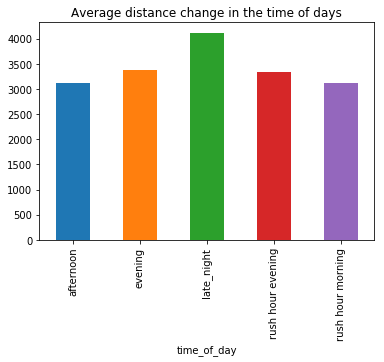

In [47]:
df.groupby(['time_of_day']).mean()['distance'].plot.bar(x = 'time_of_day', y = 'distance')
plt.title("Average distance change in the time of days")
plt.show()

## All of the average numbers seems close to eachother maximum is on the late night before late night it increases by time passes after late night it starts to decrease

## Showing how the trip duration varies as time of the day changes.

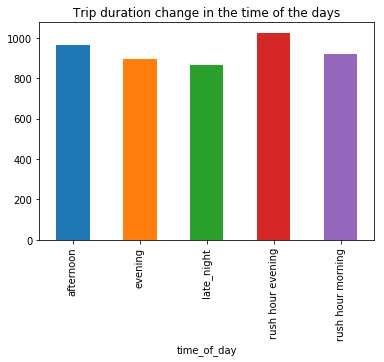

In [46]:
df.groupby(['time_of_day']).mean()['trip_duration'].plot.bar(x = 'time_of_day', y = 'trip_duration')
plt.title("Trip duration change in the time of the days")
plt.show()

# ################HYPHOTHESİS TESTİNG#####################

## Our data seems like there is not a significal difference between time of days.Trip duration decreases starting from afternon until rush hour evening , it has its peak in rush hour evening then decrease again.

## Null hypothesis: passenger group size has no effect on the distance.

In [23]:
df.groupby('passenger_count').count()


,id,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropof_district,distance,time_of_day
passenger_count,,,,,,,,,,,,,,
0,6,6,6,6,6,6,6,6,6,6,6,6,6,6
1,84290,84290,84290,84290,84290,84290,84290,84290,84290,84290,84290,84290,84290,84290
2,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800,16800
3,4634,4634,4634,4634,4634,4634,4634,4634,4634,4634,4634,4634,4634,4634
4,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188,2188
5,6296,6296,6296,6296,6296,6296,6296,6296,6296,6296,6296,6296,6296,6296
6,3971,3971,3971,3971,3971,3971,3971,3971,3971,3971,3971,3971,3971,3971


In [24]:
one_person = df[df["passenger_count"] == 1]["distance"]
two_people = df[df["passenger_count"] == 2]["distance"]
three_people = df[df["passenger_count"] == 3]["distance"]
four_people = df[df["passenger_count"] == 4]["distance"]
five_people = df[df["passenger_count"] == 5]["distance"]
six_people = df[df["passenger_count"] == 6]["distance"]


D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


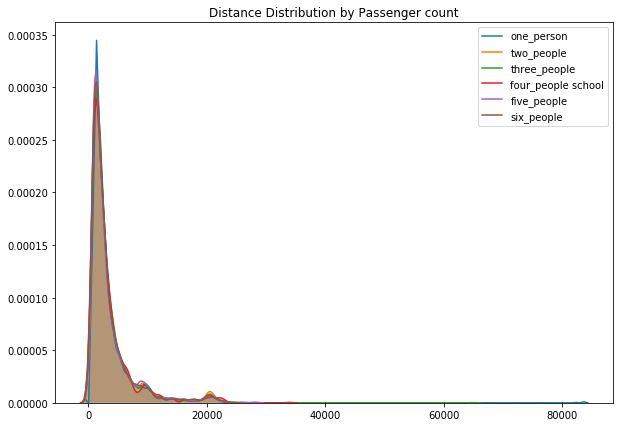

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(one_person, shade=True, ax=ax, label="one_person")
sns.kdeplot(two_people, shade=True, ax=ax, label="two_people")
sns.kdeplot(three_people, shade=True, ax=ax, label="three_people")
sns.kdeplot(four_people, shade=True, ax=ax, label="four_people school")
sns.kdeplot(five_people, shade=False, ax=ax, label="five_people")
sns.kdeplot(six_people, shade=False, ax=ax, label="six_people")

plt.title("Distance Distribution by Passenger count")
plt.show()

## In the graph we can clearly determine that there is a very little difference betweem person size and distance on the other hand we can clearly see that one person has the maximum.

## Applying ANOVA test for deciding for the correctnes of null hyphothesis

In [34]:
stats.f_oneway(one_person, two_people, three_people,four_people,five_people,six_people)

F_onewayResult(statistic=7.283096305101684, pvalue=7.86179334693054e-07)

## Because p value is smaller than significance level which is 0.05 difference between some of the means are significantl different. As a result of this, we reject the Null Hypothesis and accept the alternative hypothesis.

## Null hypothesis: The day of the week has no effect on the distance.

In [37]:
for i in range(len(df)):
    day= df.loc[i,"pickup_datetime"].dayofweek
    if day == 0 :
        df.loc[i,'week_day'] = 'weekday'  
    elif day == 1 :
         df.loc[i,'week_day'] = 'weekday'
    elif day == 2 :
         df.loc[i,'week_day'] = 'weekday'
    elif day == 3 :
         df.loc[i,'week_day'] = 'weekday'
    elif day == 4 :
         df.loc[i,'week_day'] = 'weekday'
    elif day == 5 :
        df.loc[i,'week_day'] = 'weekend'
    else :
        df.loc[i,'week_day'] = 'weekend'
      

In [38]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropof_district,distance,time_of_day,week_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1502.171837,rush hour evening,weekday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5114.806749,evening,weekday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1495.018409,rush hour morning,weekday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1976.278537,afternoon,weekday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2513.960882,afternoon,weekday


In [39]:
df.groupby('week_day').count()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropof_district,distance,time_of_day
week_day,,,,,,,,,,,,,,,
weekday,83471,83471,83471,83471,83471,83471,83471,83471,83471,83471,83471,83471,83471,83471,83471
weekend,34714,34714,34714,34714,34714,34714,34714,34714,34714,34714,34714,34714,34714,34714,34714


In [40]:
weekday_count = df[df["week_day"] == "weekday"]["distance"] 
weekend_count= df[df["week_day"] == "weekend"]["distance"] 


## Do trip distances increase in weekends?

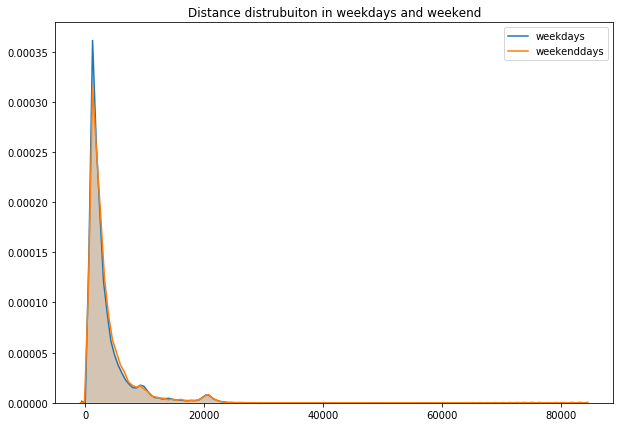

In [44]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(weekday_count, shade=True, ax=ax, label="weekdays")
sns.kdeplot(weekend_count, shade=True, ax=ax, label="weekenddays")
plt.title("Distance distrubuiton in weekdays and weekend")
plt.show()

## In the graph there is not a crucial difference between weekdays and weekends.

## Using t test to determine correctness of null hyphothesis

In [42]:
stats.ttest_ind(weekday_count, weekend_count, equal_var=False) 

Ttest_indResult(statistic=-5.604877366928578, pvalue=2.0924144330696706e-08)

 ## Just because our p value e significantl smaller than 0.05 our null hyphotesis is rejected considiring difference in means.